In [1]:
##################################
# Download, merging and annotation
##################################

In [2]:
GEOparse.__version__ 

NameError: name 'GEOparse' is not defined

In [3]:
import GEOparse
import pandas as pd
import numpy as np


# для визуализации распределения семплов в пространстве признаков
def plot_mds(X, target, colors = ['green', 'red'], labels = ['CTRL', 'HCM']):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    mds = MDS(2,random_state=0)
    X_2d = mds.fit_transform(X_scaled)
    
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.rc('font', size=14)
    for i in np.unique(target):
        subset = X_2d[target == i]
        x = [row[0] for row in subset]
        y = [row[1] for row in subset]
        plt.scatter(x, y, c=colors[i], label = labels[i])
    plt.legend()
    plt.show()

In [4]:
dataset_name = "GSE36961" # набор на 145 семплов

gse = GEOparse.get_GEO(dataset_name)
data_train = gse.pivot_samples('VALUE')

# вытаскиваем лейблы семплов

experiments = {}
for i, (idx, row) in enumerate(gse.phenotype_data.iterrows()):
    tmp = {}
    tmp["Experiment"] = idx
    tmp['platform_id'] = row['platform_id']
    tmp['status'] = 'HCM' if 'HCM' in row['source_name_ch1'] else 'CTRL'
    experiments[i] = tmp
experiments = pd.DataFrame(experiments).T

gsm_to_stat = dict(zip(experiments['Experiment'], experiments['status']))
data_train.columns = [gsm_to_stat[i] for i in data_train.columns]

02-Sep-2021 13:18:00 DEBUG utils - Directory ./ already exists. Skipping.
02-Sep-2021 13:18:00 INFO GEOparse - File already exist: using local version.
02-Sep-2021 13:18:00 INFO GEOparse - Parsing ./GSE36961_family.soft.gz: 
02-Sep-2021 13:18:00 DEBUG GEOparse - DATABASE: GeoMiame
02-Sep-2021 13:18:00 DEBUG GEOparse - SERIES: GSE36961
02-Sep-2021 13:18:00 DEBUG GEOparse - PLATFORM: GPL15389
02-Sep-2021 13:18:00 DEBUG GEOparse - SAMPLE: GSM907203
02-Sep-2021 13:18:00 DEBUG GEOparse - SAMPLE: GSM907204
02-Sep-2021 13:18:00 DEBUG GEOparse - SAMPLE: GSM907205
02-Sep-2021 13:18:00 DEBUG GEOparse - SAMPLE: GSM907206
02-Sep-2021 13:18:00 DEBUG GEOparse - SAMPLE: GSM907207
02-Sep-2021 13:18:00 DEBUG GEOparse - SAMPLE: GSM907208
02-Sep-2021 13:18:00 DEBUG GEOparse - SAMPLE: GSM907209
02-Sep-2021 13:18:01 DEBUG GEOparse - SAMPLE: GSM907210
02-Sep-2021 13:18:01 DEBUG GEOparse - SAMPLE: GSM907211
02-Sep-2021 13:18:01 DEBUG GEOparse - SAMPLE: GSM907212
02-Sep-2021 13:18:01 DEBUG GEOparse - SAMPLE: 

02-Sep-2021 13:18:10 DEBUG GEOparse - SAMPLE: GSM907343
02-Sep-2021 13:18:10 DEBUG GEOparse - SAMPLE: GSM907344
02-Sep-2021 13:18:10 DEBUG GEOparse - SAMPLE: GSM907345
02-Sep-2021 13:18:10 DEBUG GEOparse - SAMPLE: GSM907346
02-Sep-2021 13:18:10 DEBUG GEOparse - SAMPLE: GSM907347


In [5]:
dataset_name = "GSE1145"

gse = GEOparse.get_GEO(dataset_name)
data_test = gse.pivot_samples('VALUE')
data_test.head()

# вытаскиваем лейблы семплов

def status_extr(row):
    print(row['description'].split('Keywords = ')[1], row['platform_id'])
    if 'N' in row['title']:
        return 'CTRL'
    elif 'hypertrophic cardiomyopathy' in row['description'].split('Keywords = ')[1]:
        return 'HCM'
    elif 'congestive cardiomyopathy' in row['description'].split('Keywords = ')[1]:
        return 'CTRL_Con'
    else:
        return 9999

experiments = {}
for i, (idx, row) in enumerate(gse.phenotype_data.iterrows()):
    tmp = {}
    tmp['title'] = row['title'][3:]
    tmp["Experiment"] = idx
    tmp['platform_id'] = row['platform_id']
    tmp['description'] = row['description'].split('Keywords = ')[1]
    tmp['status'] = status_extr(row)
    experiments[i] = tmp
experiments = pd.DataFrame(experiments).T

tmp_exp = experiments[experiments['status'] != 9999]#[experiments['platform_id'] == 'GPL570']

data_test = data_test.filter(tmp_exp['Experiment'])    #отбираем ту часть эксперимента, которая нам нужна, сделанная на GPL570. 
                                                    #Другая часть - исследование экспрессии микроРНК
gsm_to_stat = dict(zip(tmp_exp['Experiment'], tmp_exp['status']+'_'+tmp_exp['platform_id']))
data_test.columns = [gsm_to_stat[i] for i in data_test.columns]


02-Sep-2021 13:18:13 DEBUG utils - Directory ./ already exists. Skipping.
02-Sep-2021 13:18:13 INFO GEOparse - File already exist: using local version.
02-Sep-2021 13:18:13 INFO GEOparse - Parsing ./GSE1145_family.soft.gz: 
02-Sep-2021 13:18:13 DEBUG GEOparse - DATABASE: GeoMiame
02-Sep-2021 13:18:13 DEBUG GEOparse - SERIES: GSE1145
02-Sep-2021 13:18:13 DEBUG GEOparse - PLATFORM: GPL570
/opt/anaconda3/lib/python3.7/site-packages/GEOparse/GEOparse.py:104: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath)
02-Sep-2021 13:18:14 DEBUG GEOparse - PLATFORM: GPL8300
02-Sep-2021 13:18:15 DEBUG GEOparse - SAMPLE: GSM18422
02-Sep-2021 13:18:15 DEBUG GEOparse - SAMPLE: GSM18423
02-Sep-2021 13:18:15 DEBUG GEOparse - SAMPLE: GSM18424
02-Sep-2021 13:18:15 DEBUG GEOparse - SAMPLE: GSM18425
02-Sep-2021 13:18:15 DEBUG GEOparse - SAMPLE: GSM18426
02-Sep-2021 13:18:15 DEBUG GEOparse - SAMPLE: GSM18427
02-Sep-2021 13:18:15 DEBUG

human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
human, idiopathic, ischemic, ca

In [6]:
def annotation(data_test, platform):
    data_test['index'] = data_test.index

    # annotate with GPL
    data_test = data_test.reset_index().merge(gse.gpls[platform].table[["ID", "Gene Symbol"]],
                                    left_on='index', right_on="ID").set_index('index')
    del data_test["ID"]
    # remove probes without ENTREZ
    data_test = data_test.dropna(subset=['Gene Symbol'])
    # remove probes with more than one gene assigned
    data_test = data_test[~data_test['Gene Symbol'].str.contains("///")]
    # for each gene average LFC over probes
    data_test = data_test.groupby('Gene Symbol').median()
    return data_test

In [7]:
#этот блок появился для расширения тестового набора стенозниками
#аннотируем отдельно данные которые были получена на чипе GPL570 и на GPL8300

# GPL570
mask_570 = np.array(list(map(lambda x: 'GPL570' in x, data_test.columns)))
data_570 = data_test.loc[:,mask_570]
data_570_annot = annotation(data_570, 'GPL570')

# GPL8300
data_8300 = data_test.loc[:,mask_570 == False]
data_8300_annot = annotation(data_8300, 'GPL8300')

# merge 
data_8300_annot['index'] = data_8300_annot.index
data_570_annot['index'] = data_570_annot.index

data_8300_570 = data_8300_annot.reset_index().merge(data_570_annot,
                                    left_on='index', right_on="index").set_index('index')

data_570_annot = data_570_annot.iloc[:,:-1] #выкидываем индекс
data_test = data_570_annot #возвращаем название для дальнейщего анализа, как это делалось ранее

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
print('test:', data_test.shape)
print('train:', data_train.shape)

# отбираем те гены, которые есть в обоих наборах
set_test = set(data_test.index)
gene_universe = set_test.intersection(data_train.index)

data_train = data_train.filter(gene_universe, axis=0)
data_test = data_test.filter(gene_universe, axis=0)

print()
print('test:', data_test.shape)
print('train:', data_train.shape)

test: (21655, 16)
train: (37846, 145)

test: (14830, 16)
train: (14830, 145)


In [9]:
class Data(object): 
    def __init__(self):
        pass
    
Data.X = Data()
Data.X.train = data_train
Data.X.test = data_test
Data.y = Data()
Data.y.train = list(map(int, Data.X.train.columns == 'HCM'))
Data.y.test = list(map(int, Data.X.test.columns == 'HCM'))

In [49]:
#################################
# Feature selection
#################################

In [ ]:
"""
Главная идея:

Выборка маленькая, поэтому не будем избегать влияния случайности, например фиксируя random_state, а будем пытаться эту случайность оседлать.

Как будем отбирать фичи?

1) Фичи будем отбирать на основе лог.регрессии.
        а) подберем коэффициент L1-регуляризации
        б) будем обучать 1000 моделей на бутстрепленных из X_train данных
        в) фичи, которые попали в модель, которая хоть как-то работает (coef > 0) хоть в одной работающей (roc-auc > 0.7) моделе, будем сохранять в словарик

2) Отобранные фичи упорядочим по их ценности, за которую примем произведение roc-auc модели, из которой пришла фича, coef и количества моделей, в которые фича была включена.
                                            идея: чем в большее число хорошо работающих моделей включается фича - тем она ценнее

3) Финально выберем какую-то долю из тех фичей, которые входят в топ-20 фичей упорядоченного списка

"""

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics, linear_model, model_selection
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import shap
import random
from sklearn.manifold import MDS
from collections import Counter
from random import choices
from itertools import compress

roc_auc_scorer = metrics.make_scorer(metrics.roc_auc_score)
scaler = StandardScaler()

In [159]:
# train test split and scaling

X_train, X_test, y_train, y_test = train_test_split(Data.X.train.transpose(), Data.y.train, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# возвращаем имена фичей
X_train = pd.DataFrame(X_train, columns=Data.X.train.index)
X_test = pd.DataFrame(X_test, columns=Data.X.train.index)

In [12]:
C = np.array([0.2, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01])

0
1
2
3
4
5
6
7
8
9


[<matplotlib.lines.Line2D at 0x7fcb00b3a350>]

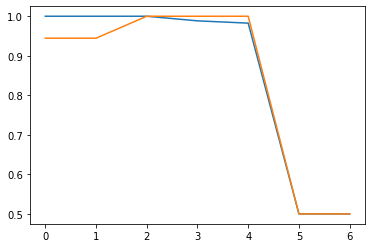

In [64]:
# Подбираем коэффициент регуляризации. Выбираем тот, после которого всё качество идет по п*зде

result_df_train = pd.DataFrame()
result_df_test = pd.DataFrame()


# 10 раз шатаем модель по разным random_state, потом усредняем по смотрим на результат по коэффициентам

for a in range(0,10):
    print(a)
    random_state = random.randint(1,100)
    roc_auc_train = list()
    roc_auc_test = list()
    for i in C:
        linear_regressor = linear_model.LogisticRegression(penalty='l1', C=i, solver='liblinear', random_state=random_state)
        linear_regressor.fit(X_train, y_train)
        roc_auc_train.append(metrics.roc_auc_score(y_train, linear_regressor.predict(X_train)))
        roc_auc_test.append(metrics.roc_auc_score(y_test, linear_regressor.predict(X_test)))
    result_df_train[a] = roc_auc_train
    result_df_test[a] = roc_auc_test

plt.plot(result_df_train.apply(np.mean, axis=1))
plt.plot(result_df_test.apply(np.mean, axis=1))

In [212]:
class FeatureExtraction(object):
    
    """
    Класс для экстракции фичей. Главная идея не фиксировать случайность, а оседлать её :)
    
    """
    
    
    def __init__(self, ):
        pass
        
    def fit(self, n_iter, X_train, y_train, X_test, y_test, C=0.03):
        
        """
        Будем n_iter раз бутстрепить сбалансированную train выборку из X_train.
        Обучаем лог.рег. с L1-решуляризацией, с коэффициентом как мы отобрали выше.
        Тестим на X_test, значение добавляем в roc_auc_list
        
        Если на X_test модель работает круче 0.7, то: 
            1) ненулевые фичи модели добавляем в словарик отобранных фичей feature_dict
            2) обновляем число фичей в перменной len_best_feature = len(feature_dict.keys())
        Если нет, то:
            3) дублируем последнее значение в len_best_feature, т.к. число фичей не изменилось
        """
        
        len_best_feature = [0] # заводим лист, в котором будем отслеживать изменение количества фичей
        len_best_more_one = [0] # заводим лист, в котором будем отслеживать изменение количества числа включений уже включенных фичей
        roc_auc_list = list() # аналогично, отслеживаем как меняется roc-auc, так для интереса
        feature_dict = dict() # # словарь "ген: log.reg.coef"
        
        
        for i in range(0, n_iter):

            random_state = random.randint(0, 500) # явным образом шатаем рандомстейт

            # чтобы получить сбаланнсированную выборку, бутстрепим отдельно семплы из контроля и из опыта

            mask = np.array(y_train) == 0
            
            k_len = min(len(mask)-sum(mask), sum(mask)) #размер выборки бутстрепа, берем размер минимальной группы HCM или CTRL

            CTRL_rows = list(compress(range(0, len(mask)), mask))
            HCM_rows = list(compress(range(0, len(mask)), mask == False))

            _HCM_rows = choices(HCM_rows, k=k_len) # бутстрепим номера строк из группы больных
            _CTRL_rows = choices(CTRL_rows, k=k_len) # бутстрепим номера строк из группы здоровых

            # объединяем это всё дело обратно

            _X_train = pd.DataFrame(X_train).iloc[_HCM_rows + _CTRL_rows,:]
            _y_train = np.array(y_train)[_HCM_rows + _CTRL_rows]

            # обучаем лог.рег. с ранее отобранным коэффициентом регуляризации

            linear_regressor = linear_model.LogisticRegression(penalty='l1', C=C, solver='liblinear', 
                                                               random_state=random_state)
            linear_regressor.fit(_X_train, _y_train)

            # тестим

            roc_auc = metrics.roc_auc_score(y_score=linear_regressor.predict(X_test), y_true=y_test)
            roc_auc_list.append(roc_auc)

            # далее отбираем фичи из моделей, которые хоть как-то работают (roc_auc > 0.7)

            if roc_auc > 0.7:
                # отбираем смысловые фичи
                mask = linear_regressor.coef_ != 0 
                genes = X_train.columns[mask[0]]
                values = linear_regressor.coef_[mask]

                _feature_dict = dict(zip(genes, abs(values)*roc_auc)) #делаем временный словарь "ген: его ценность"

                # обнавляем глобальный словарь фичей
                for gene, values in _feature_dict.items():
                    if gene in feature_dict:
                        feature_dict[gene].append(values)
                    else:
                        feature_dict[gene] = [values]

                len_best_feature.append(len(feature_dict.keys()))
                
                feature_distr = np.array(list(map(lambda x: len(feature_dict[x]), feature_dict)))
                len_best_more_one.append(sum(feature_distr[feature_distr > 1]))
            
            else:
                # если модель была говёной, то просто дублируем предыдущее значение. Ну, число фичей то не изменилось :)
                len_best_feature.append(len_best_feature[-1])
                len_best_more_one.append(len_best_more_one[-1]) 
        
        
        
        self.len_best_more_one = np.array(len_best_more_one)
        self.len_best_feature = np.array(len_best_feature)
        self.feature_dict = feature_dict
        self.roc_auc_list = roc_auc_list
    

In [268]:
df_bmo = list()
df_bf = list()

for _ in range(0,10):
    fe = FeatureExtraction()
    fe.fit(500, X_train, y_train, X_test, y_test)
    df_bmo.append(fe.len_best_more_one)
    df_bf.append(fe.len_best_feature)

[<matplotlib.lines.Line2D at 0x7fa4e5beb210>]

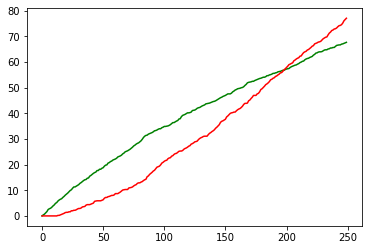

In [275]:
#посмотрим, как с каждой итерацией нарастают фичи

plt.plot(pd.DataFrame(df_bf).mean()[:250], 'green') #прирост новых фичей
plt.plot(pd.DataFrame(df_bmo).mean()[:250], 'red') #прирост фичей, которые уже встречались

(array([106.,  17.,   9.,   6.,   0.,   3.,   0.,   0.,   1.,   1.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

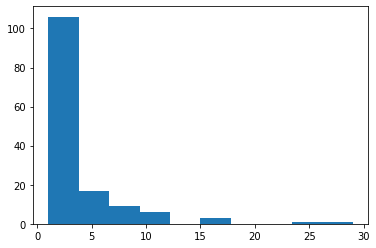

In [239]:
# а вот так выглядит распределение фичей по частоте их включения в модельки.
# больше 200 фичей включались только один раз, ну, очевидно, что это мусор.

feature_distr = list(map(lambda x: len(fe.feature_dict[x]), fe.feature_dict))
plt.hist(feature_distr)

In [277]:
"""
Идея: повторим экстракцию фичей 50 раз (вычислительно емко получается для ноутбучика), 
отсортируем каждый из получившихся наборов по важности фичей, найдем размер окна для отбора n-топ фичей, 
в котором состав фичей минимально изменяется от набора к набору. А потом отберем те фичи, которые всегда встречаются в окне этого размера.
"""

scaler = StandardScaler()
list_feature_dicts = list()

for i in range(0,50):
    print(i)
    # train_test split and transformation
    X_train, X_test, y_train, y_test = train_test_split(Data.X.train.transpose(), 
                                                        Data.y.train, test_size=0.2, random_state=i)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # возвращаем имена фичей
    X_train = pd.DataFrame(X_train, columns=Data.X.train.index)
    X_test = pd.DataFrame(X_test, columns=Data.X.train.index)
    
    # отбор фичей
    fe = FeatureExtraction()
    fe.fit(150, 
           X_train, y_train, X_test, y_test)
    list_feature_dicts.append(fe.feature_dict)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


ValueError: Seed must be between 0 and 2**32 - 1

In [329]:
lfd = list_feature_dicts

In [330]:
# удаляем фичи, которые были включены только в одну модель, как сказали выше - это мусор

for i in range(0, len(lfd)):
    d = lfd[i]
    lfd[i] = {k : v for k, v in d.items() if len(v)>1}

In [331]:
# преобразуем словарь в gene: gene_impact
for i in range(0, len(lfd)):
    d = lfd[i]
    lfd[i] = {k : len(v)*np.median(v) for k, v in d.items() if len(v)>1}

In [336]:
gene_universe = set() #множество всех рассматриваемых генов
for i in range(0, len(lfd)):
    gene_universe.update(lfd[i].keys())

In [339]:
# найдем среднее gene_impact по всем наборам
gene_median_value = dict()
for gene in gene_universe:
    value = list()
    for gene_list in lfd:
        if gene in gene_list:
            value.append(gene_list[gene])
    gene_median_value[gene] = np.median(value)

(array([12., 30., 34., 28., 16.,  3.,  0.,  0.,  0.,  1.]),
 array([0.0101141 , 0.04009321, 0.07007233, 0.10005144, 0.13003056,
        0.16000967, 0.18998878, 0.2199679 , 0.24994701, 0.27992613,
        0.30990524]),
 <a list of 10 Patch objects>)

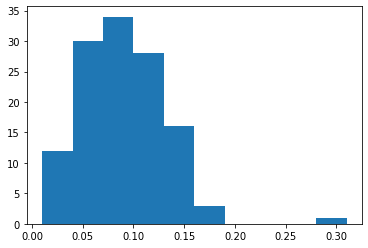

In [342]:
plt.hist(gene_median_value.values())

In [345]:
gene_value = dict()
for gene in gene_universe:
    value = sum(list(map(lambda x: gene in list(x.keys()), lfd)))*gene_median_value[gene]/len(lfd)
    gene_weight[gene] = value

{'TIPARP': 0.018769715401353713,
 'CYP2J2': 0.004466502653600409,
 'S100A8': 0.002611342355908258,
 'SLC39A1': 0.003653595727394407,
 'CHN1': 0.05905317343746285,
 'BTG2': 0.01114863162021746,
 'OSR1': 0.0063912466514896675,
 'SMOC2': 0.0029409226452557094,
 'DUSP1': 0.002380830485778258,
 'ZNF627': 0.0005626083393127966,
 'S100A9': 0.028111506762506684,
 'TOMM40': 0.0011043648275640419,
 'LILRB5': 0.0037077401840079154,
 'RANGAP1': 0.003234415901981702,
 'ALOX5': 0.0023785405282821383,
 'MNS1': 0.007963833069897336,
 'GATA2': 0.004861778827810319,
 'WWC1': 0.0021373980326529875,
 'CD248': 0.01031175893646586,
 'SLC1A5': 0.001864638040640463,
 'JAK2': 0.010649663645332522,
 'PLEKHF1': 0.0011354616551344304,
 'CD163': 0.014052371706747405,
 'SEMA4B': 0.0008722434056531979,
 'CTSC': 0.0017576720171814419,
 'NCF4': 0.0007446630445850865,
 'CMTM7': 0.002103871895461158,
 'SPOCK1': 0.0014478631524921478,
 'TDRD9': 0.005297925434279637,
 'LRRC8A': 0.0017485474011828342,
 'MAFB': 0.0022030051

In [365]:
q_prob = np.quantile(list(gene_weight.values()), 0.95)
best_features = [k for k in gene_weight.keys() if gene_weight[k] > q_prob]

In [366]:
best_features

['MYH6', 'MT1M', 'FCN3', 'RASD1', 'CEBPD', 'CDC42EP4', 'PRKCD']

In [281]:
#сортируем фичи в порядке убывания их значимости
#значимость считаем как (число включений в моедль)*(roc_auc_модели)*(abs(coef_))

lfd_sort = list()
for d in lfd:
    lfd_sort.append(dict(sorted(d.items(), key=lambda item: len(item[1])*np.median(item[1]), reverse=True)))

In [282]:
"""
Идея:

Хотим выбрать топ n генов, который минимально изменяется от набора в lfd к набору (с точностью до перестановки). 
Очевидно 1 < n < минимального набора генов.

"""

result = list()

min_len = min(list(map(lambda x: len(x.keys()), lfd_sort))) # минимальная длина словаря feature_dict 

for yeld in range(1, min_len):
    
    similarity = np.zeros((20,20))
    
    for i in range(0,20):
        for j in range(0,20):
            one_set = set(list(lfd_sort[i].keys())[:yeld])
            two_set = set(list(lfd_sort[j].keys())[:yeld])
            sim = len(one_set.intersection(two_set))/yeld
            similarity[i,j] = sim
    
    result.append(np.mean(similarity))

'\nВ окне до 20 фичей всё немного колабисит. Очевидно топовые фичи прыгают по позициям от 0 до 20. \nПосле 20 график стабильно падает, стало быть на следующих позициях уже становится всё больше и больше рандома.\nНайдем точку перелома (она оказалась равна 18), и дальше будем оперировать окном этого размера.\n'

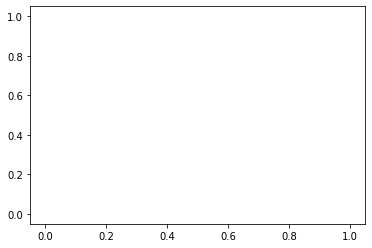

In [283]:
plt.plot(result)

"""
В окне до 20 фичей всё немного колабисит. Очевидно топовые фичи прыгают по позициям от 0 до 20. 
После 20 график стабильно падает, стало быть на следующих позициях уже становится всё больше и больше рандома.
Найдем точку перелома (она оказалась равна 18), и дальше будем оперировать окном этого размера.
"""

In [75]:
result[15:25] == max(result[15:25]) #выбираем n для следующего чанка

array([False, False, False, False, False, False,  True, False, False,
       False])

In [81]:
#отбираем гены, которые всегда занимают в словарях первые n мест
TOP = 22

top_20_gene_list = map(lambda x: list(x.keys())[:TOP], lfd_sort)

top_gene = set()
for i in top_20_gene_list:
    top_gene.update(i)

In [82]:
# посчитаем gene_weight, как долю моделей, где gene находится на первых n-местах

gene_weight = dict()
for gene in top_gene:
    value = sum(list(map(lambda x: gene in list(x.keys())[:TOP], lfd_sort)))/len(lfd_sort)
    gene_weight[gene] = value

(array([29.,  9.,  1.,  0.,  1.,  3.,  1.,  6.,  3.,  9.]),
 array([0.02631579, 0.12368421, 0.22105263, 0.31842105, 0.41578947,
        0.51315789, 0.61052632, 0.70789474, 0.80526316, 0.90263158,
        1.        ]),
 <a list of 10 Patch objects>)

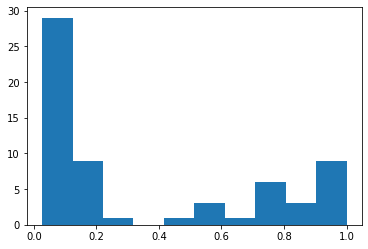

In [83]:
plt.hist(list(gene_weight.values()))

In [122]:
best_features = [k for k in gene_weight.keys() if gene_weight[k] > 0.4]

In [123]:
print(*best_features)

RASD1 AP3M2 MYH6 LYVE1 ZFP36 PIK3IP1 CHN1 FKBP5 C1R S100A9 SERPINA3 MT1X MT1M DYRK1B CEBPD PROS1 JAK2 YPEL2 MAP3K6 S1PR3 CDC42EP4 FCN3 PRKCD


In [124]:
print(*best_features)

RASD1 AP3M2 MYH6 LYVE1 ZFP36 PIK3IP1 CHN1 FKBP5 C1R S100A9 SERPINA3 MT1X MT1M DYRK1B CEBPD PROS1 JAK2 YPEL2 MAP3K6 S1PR3 CDC42EP4 FCN3 PRKCD


In [ ]:
#################################
# model train
#################################

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import Normalizer

# для визуализации распределения семплов в пространстве признаков
def plot_mds(X, target, colors = ['green', 'red'], labels = ['CTRL', 'HCM']):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    mds = MDS(2,random_state=0)
    X_2d = mds.fit_transform(X_scaled)
    
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.rc('font', size=14)
    for i in np.unique(target):
        subset = X_2d[target == i]
        x = [row[0] for row in subset]
        y = [row[1] for row in subset]
        plt.scatter(x, y, c=colors[i], label = labels[i])
    plt.legend()
    plt.show()

scaler = StandardScaler()
normalizer = Normalizer()

def StandartScaling(X):
    
    scaler = StandardScaler()
    """
    X - matrix, features in columns, samples in rows
    """
    
    colnames = X.columns 
    X = X.transpose()   # StandardScaler работает по столбцам, поэтому транспонируем, чтобы в столбцах оказались семплы
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X.transpose(), columns=colnames)
    return(X)

In [26]:
X = pd.read_csv('./X_train.csv', index_col=0).transpose()
X_test_out = pd.read_csv('./X_test_out.csv', index_col=0).transpose()
X_test_out_extension = pd.read_csv('./X_test_out_extension.csv', index_col=0).transpose()

y = list(pd.read_csv('./y_train.csv').iloc[:,1])
y_test_out = list(pd.read_csv('./y_test_out.csv').iloc[:,1])
y_test_out_extension = list(pd.read_csv('./y_test_out_extension.csv').iloc[:,1])

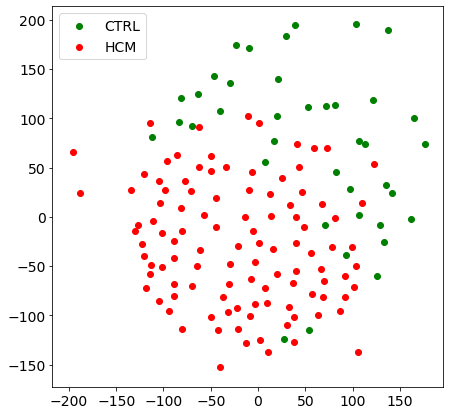

In [27]:
plot_mds(X, y)

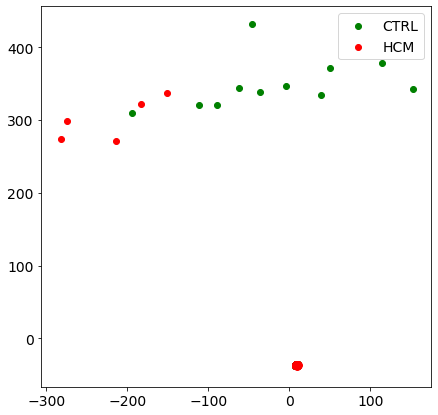

In [31]:
plot_mds(pd.concat([X_test_out, X]), y_test_out + y)

In [368]:
#best_features = ['FCN3', 'MT1X', 'PROS1', 'MYH6', 'CDC42EP4', 'ZFP36', 'PRKCD', 'LYVE1', 'CEBPD', 'MT1M', 'RASD1', 'S1PR3']

#X = Data.X.train.transpose().filter(best_features, axis=1)
#X_test_out = Data.X.test.transpose().filter(best_features, axis=1)
#y = Data.y.train
#y_test_out = Data.y.test

X = pd.read_csv('./X_train.csv', index_col=0).transpose().filter(best_features, axis=1)
X_test_out = pd.read_csv('./X_test_out.csv', index_col=0).transpose().filter(best_features, axis=1)
X_test_out_extension = pd.read_csv('./X_test_out_extension.csv', index_col=0).transpose().filter(best_features, axis=1)

y = list(pd.read_csv('./y_train.csv').iloc[:,1])
y_test_out = list(pd.read_csv('./y_test_out.csv').iloc[:,1])
y_test_out_extension = list(pd.read_csv('./y_test_out_extension.csv').iloc[:,1])

# этих фичей не хватает в расширенном наборе, т.к. стенозники делались на другой платформе
#X_test_out_extension['LYVE1'] = 0 
#X_test_out_extension['MT1M'] = 0
#X_test_out_extension['RASD1'] = 0
#X_test_out_extension['S1PR3'] = 0

print(X.shape, X_test_out.shape, X_test_out_extension.shape)

(145, 7) (16, 7) (33, 5)


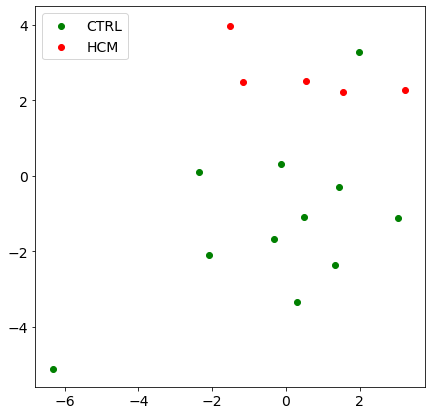

In [3]:
plot_mds(X_test_out, y_test_out)

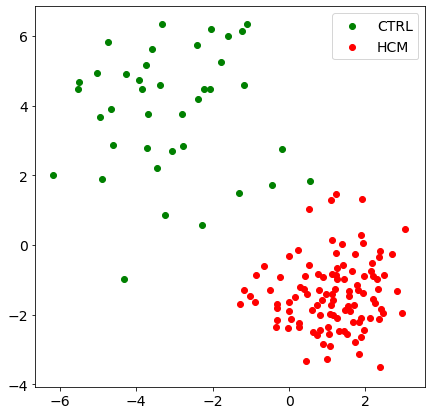

In [4]:
plot_mds(X, y)

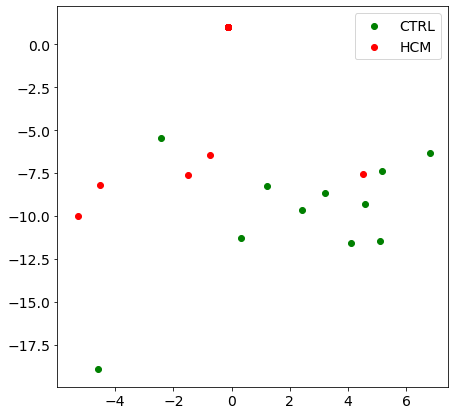

In [5]:
plot_mds(pd.concat([X, X_test_out]), y + y_test_out)

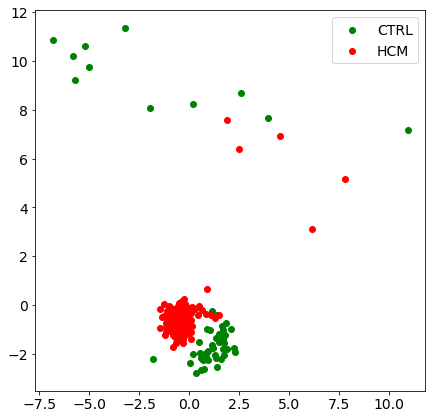

In [6]:
colnames = X.columns
X_norm = pd.DataFrame(normalizer.fit_transform(X), columns=colnames)
X_test_out_norm = pd.DataFrame(normalizer.fit_transform(X_test_out), columns=colnames)
plot_mds(pd.concat([X_norm, X_test_out_norm]), y + y_test_out)

[<matplotlib.lines.Line2D at 0x7fbb7a5eae50>]

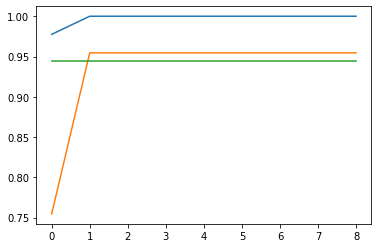

In [85]:
"""

##
## Тюнинг случайного леса
##
##

class stack_model(object):
    
    def __init__(self, rf_params):
        
        self.rf_params = rf_params

        self.estimators = [
            ('rf', make_pipeline(StandardScaler(),
                                 RandomForestClassifier(**self.rf_params))),
            ('logreg', make_pipeline(StandardScaler(),
                                     LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', 
                                                        penalty='l2', C=0.05)))
             ]
        self.clf = StackingClassifier(estimators=self.estimators, 
                                 final_estimator=LogisticRegression(penalty='l2', C=1), 
                                 passthrough = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_res = list()
test_out = list()
train_res = list()

for i in range(1,10):
    d = {'random_state': 42, 'n_estimators': 50, 'max_samples': 0.5, 'max_features': 'auto', 
                     'max_depth': i, 'class_weight': 'balanced', 'bootstrap': 'True'}
    model = stack_model(d)
    clfStack = model.clf.fit(X_train, y_train)
    
    train_res.append(metrics.roc_auc_score(y_score=clfStack.predict(X_train), y_true=y_train))
    test_out.append(metrics.roc_auc_score(y_score=clfStack.predict(X_test_out), y_true=y_test_out))
    test_res.append(metrics.roc_auc_score(y_score=clfStack.predict(X_test), y_true=y_test))

plt.plot(train_res)
plt.plot(test_out)
plt.plot(test_res)

"""

In [369]:
rf_params = {'random_state': 42, 'n_estimators': 50, 'max_samples': 0.5, 'max_features': 'auto', 
             'max_depth': 3, 'class_weight': 'balanced', 'bootstrap': 'True'}

estimators = [
    ('rf', make_pipeline(Normalizer(),
                         RandomForestClassifier(**rf_params))),
    ('logreg', make_pipeline(Normalizer(),
                             StandardScaler(),
                             LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', 
                                                penalty='l2', C=0.03)))
     ]
clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(penalty='l2', C=1), 
                         passthrough = False)

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clfStack = clf.fit(X_train, y_train)

print("train:", metrics.roc_auc_score(y_score=clfStack.predict(X_train), 
                                      y_true=y_train))
print('test_in:', metrics.roc_auc_score(y_score=clfStack.predict(X_test), 
                                           y_true=y_test))
print("test_out:", metrics.roc_auc_score(y_score=clfStack.predict(X_test_out), 
                                     y_true=y_test_out))
#print("test_out_ext:", metrics.roc_auc_score(y_score=clfStack.predict(X_test_out_extension), 
#                                     y_true=y_test_out_extension))

train: 0.9775193798449613
test_in: 0.8638888888888888
test_out: 0.5


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 train
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 test


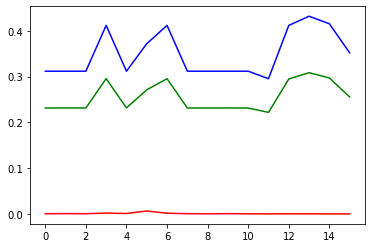

In [371]:
plt.plot(clf.estimators_[0].predict_proba(X_test_out)[:,1], 'blue')
plt.plot(clf.estimators_[1].predict_proba(X_test_out)[:,1], 'red')
plt.plot(clf.predict_proba(X_test_out)[:,1], 'green')
print(*list(clf.predict(X_test_out)), 'train')
print(*y_test_out, 'test')

In [12]:
#################################
# interpretaion
#################################

In [13]:
import shap

In [14]:
X_train_summary = shap.kmeans(X_train, 10)
ex = shap.KernelExplainer(clfStack.predict, X_train_summary)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


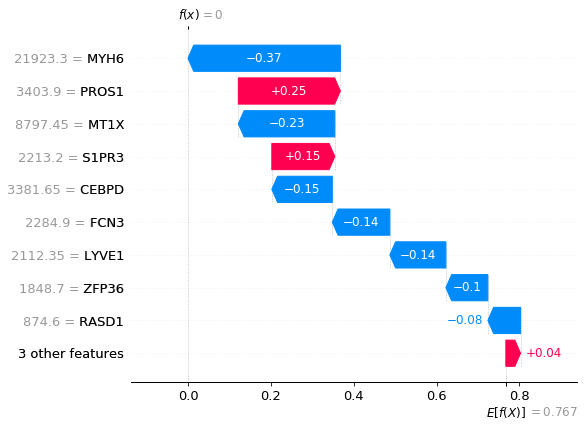

In [33]:
shap.initjs()
shap_values = ex.shap_values(X_test_out.iloc[9,:])
shap.plots.waterfall.waterfall_plot(ex.expected_value, shap_values, X_test_out.iloc[9,:])

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


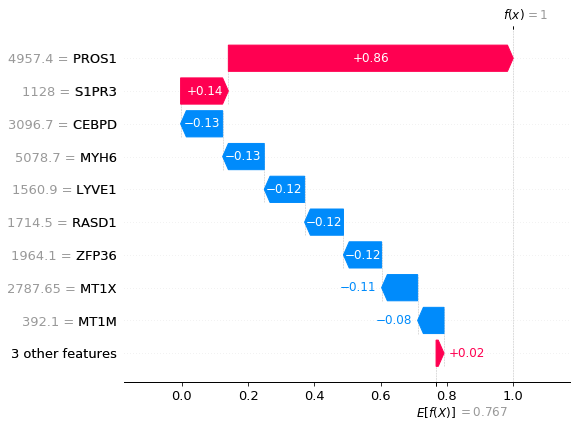

In [34]:
shap.initjs()
shap_values = ex.shap_values(X_test_out.iloc[13,:])
shap.plots.waterfall.waterfall_plot(ex.expected_value, shap_values, X_test_out.iloc[13,:])

In [32]:
shap.initjs()
shap_values = ex.shap_values(X_test_out)
shap.force_plot(ex.expected_value, shap_values, X_test_out)

  0%|          | 0/16 [00:00<?, ?it/s]

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

In [16]:
def shap_plot(X, y, shap_values):

    spdf = pd.DataFrame(shap_values[np.array(y) != 1,:], columns=X.columns)

    spdf_ctrl = pd.DataFrame(spdf.sum(axis=0), columns=['CTRL'])

    spdf_hcn = pd.DataFrame(shap_values[np.array(y) == 1,:], columns=X.columns)
    spdf_hcn = pd.DataFrame(spdf_hcn.sum(axis=0), columns=['HCM'])

    spdf = pd.concat([spdf_hcn, spdf_ctrl], axis=1)

    x = spdf['CTRL']
    y = spdf['HCM']

    plt.figure(figsize=(13,13))
    plt.scatter(x, y)
    plt.axvline(0)
    plt.axhline(0)
    plt.xlabel('CTRL SHAPE value')
    plt.ylabel('HCM SHAPE value')
    for i, txt in enumerate(spdf.index):
        plt.annotate(txt, (x[i], y[i]))

    return(spdf)
    #plt.savefig('./shape_by_gene.png', dpi = 300)

  0%|          | 0/16 [00:00<?, ?it/s]

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

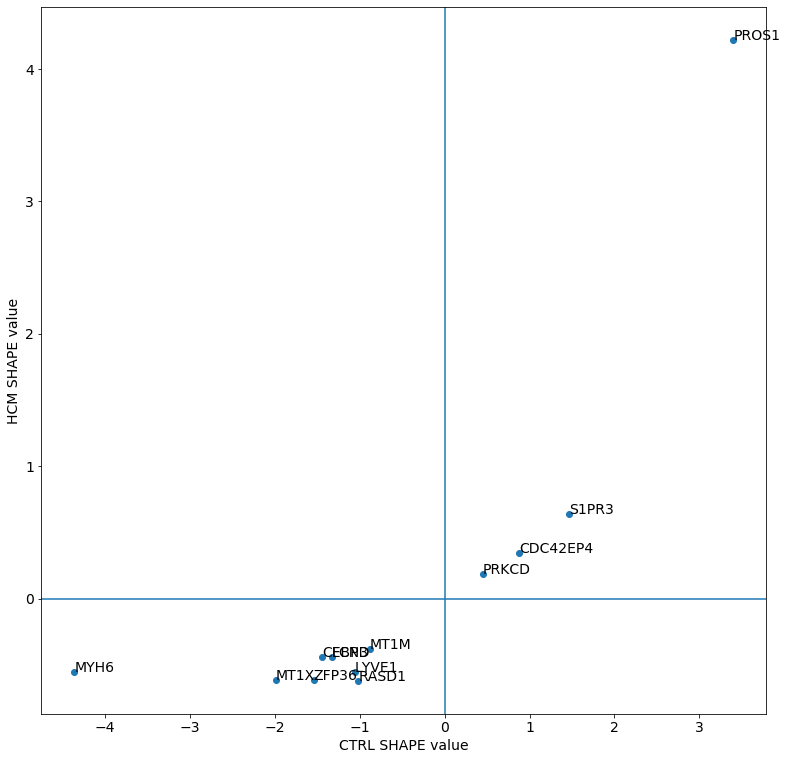

In [31]:
shap_values = ex.shap_values(X_test_out)
spdf = shap_plot(X_test_out, y_test_out, shap_values)
spdf.to_csv('../best_genes_SHAPE_distance.csv')

In [21]:
#################################
# reactome 
#################################

In [37]:
print(*best_features, sep=', ')

FCN3, MT1X, PROS1, MYH6, CDC42EP4, ZFP36, PRKCD, LYVE1, CEBPD, MT1M, RASD1, S1PR3


In [43]:
import json

In [44]:
f = open('../Data/ReactomePathways.gmt', 'r')

Reactome_path = dict()
for i in f:
    line = i.rstrip('\n').split('\t')
    Reactome_path[line[1]] = {'name': line[0], 
                           'genes': line[2:]}

In [45]:
def grep_path_ID(x, gene):
    if gene in Reactome_path[x]['genes']:
        return x

gene_to_path = dict()
for gene in best_features:
    _paths = np.array(list(map(lambda x: grep_path_ID(x, gene=gene), Reactome_path.keys())))
    
    _paths = list(_paths[_paths != None])
    
    gene_to_path[gene] = dict()
    
    if len(_paths) != 0:
    
        for path in _paths:
            if len(Reactome_path[path]['genes']) < 500:
                gene_to_path[gene][path] = Reactome_path[path]['genes']

In [26]:
with open('../Data/best_gene_to_path.json', 'w') as outfile:
    json.dump(gene_to_path, outfile)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd3ce19910>,
      dtype=object)

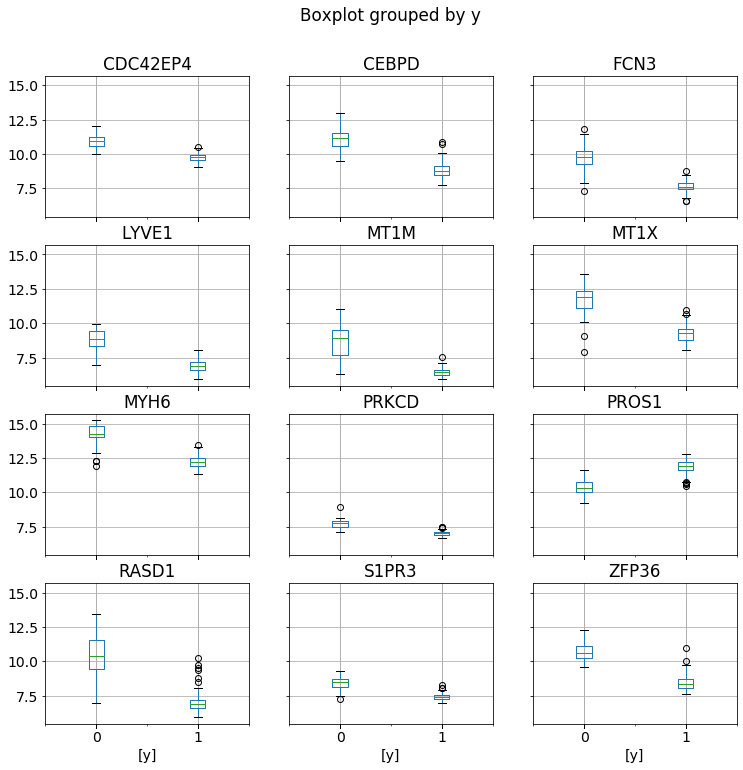

In [40]:
data = X
data['y'] = y
data.head()
data.boxplot(by='y', figsize=(12,12))

In [262]:
ATG = Reactome_path['R-HSA-9612973']['genes']

ATG = Reactome_path['R-HSA-5205647']['genes']

ATG = ['LC3II', 'BECN1', 'BCL2', 'BAX', 'CASP3']

In [263]:
X = pd.read_csv('./X_train.csv', index_col=0).transpose()

In [240]:
colnames = X.columns
normalizer = Normalizer()
data = pd.DataFrame(normalizer.fit_transform(np.log(X)), columns=colnames)

In [241]:
data = pd.DataFrame(data.transpose())

In [242]:
data.to_csv('./for_Reactome_GSEA.csv')

In [247]:
np.array(data.columns)[np.array(y)==0]

array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144])

In [264]:
X_ATG = np.log(X.loc[:,list(map(lambda x: x in ATG, X.columns))])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd0bdfc210>,
      dtype=object)

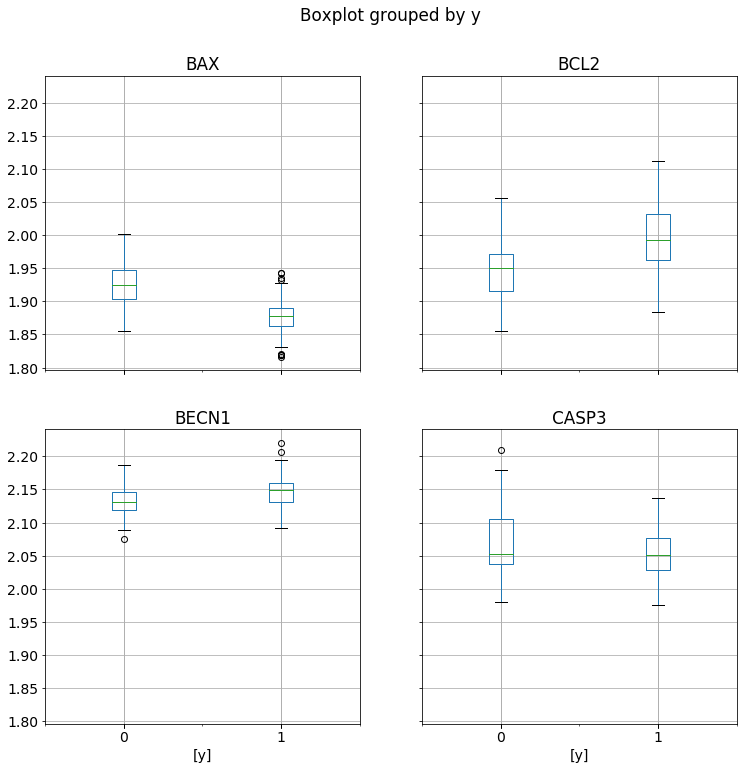

In [265]:
X_ATG['y'] = y
X_ATG.boxplot(by='y', figsize=(12,12)) 

In [270]:
pvalues = list()
for i in range(0,X_ATG.shape[1]-1):
    pvalue = stats.wilcoxon(X_ATG.iloc[:,i][np.array(y)==1][0:39], X_ATG.iloc[:,i][np.array(y)==0]).pvalue
    pvalues.append(pvalue)
    
pvalues_adj = multi.multipletests(pvalues, method='fdr_bh')[1]

In [198]:
import statsmodels.stats.multitest as multi

In [273]:
list(zip(X_ATG.columns, pvalues_adj))

[('BECN1', 0.022691528801486407),
 ('BCL2', 5.131492843088875e-06),
 ('BAX', 3.123793014241283e-06),
 ('CASP3', 0.4595337043249743)]

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([3.12379301e-06, 4.59561818e-02, 9.19092399e-02, 1.37862298e-01,
        1.83815356e-01, 2.29768414e-01, 2.75721472e-01, 3.21674530e-01,
        3.67627588e-01, 4.13580646e-01, 4.59533704e-01]),
 <a list of 10 Patch objects>)

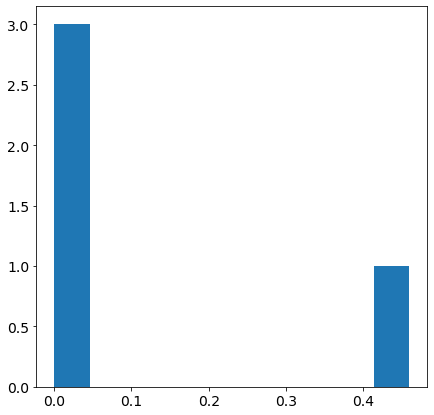

In [272]:
plt.hist(pvalues_adj)

In [211]:
np.array(X_ATG.columns)[np.array(pvalues_adj) < 0.05]

array(['APOB', 'APOA1', 'GSN', 'AKR1C4', 'GNB1', 'AGRN', 'SDC2', 'MYO1C',
       'OR51E1', 'EPB41L1', 'AKR1B10', 'RDH10', 'PDE6A', 'MYH9', 'KCNMA1',
       'RDH5', 'GUCA1C', 'SPTAN1', 'MSN', 'AKR1C3', 'METAP2', 'CTBP2',
       'GPC1', 'XIRP2', 'PDE6B', 'SPTBN1', 'LRP8', 'EPB41L3', 'DHRS3',
       'FAM65B', 'APOE', 'LDLR', 'GRK4', 'TMIE', 'GUCA1B', 'RETSAT',
       'NMT1', 'KCNMB1', 'CAPZB', 'GPIHBP1', 'NAPEPLD', 'MYO7A', 'DNAJC5',
       'CABP1', 'PRKCQ', 'RBP1', 'GNAT1', 'APOM'], dtype=object)

In [115]:
np.array(X_ATG.columns)[np.array(pvalues) < 0.05]

array(['PRKAA2', 'PCNT', 'PARK7', 'ATG7', 'GABARAP', 'MAP1LC3A',
       'CSNK2A1', 'WDR45', 'VPS37C', 'RRAGB', 'DYNLL1', 'VPS37A',
       'PIK3R4', 'MFN2', 'GABARAPL1', 'CHMP4B', 'ATG4C', 'TOMM40',
       'MTMR3', 'HSF1', 'DYNC1LI2', 'CHMP2A', 'BECN1', 'ATG4D', 'RNASE1',
       'RRAGD', 'FUNDC1', 'HBB', 'DYNC1H1', 'ATG4B', 'UBAP1', 'ULK1',
       'RB1CC1', 'IFT88', 'TSC1', 'ATG5', 'RHEB', 'CSNK2A2', 'GABARAPL2',
       'PGAM5', 'VDAC1', 'WIPI1', 'CHMP7', 'VPS37B', 'MTMR14', 'VPS37D',
       'UBC', 'PRKAG1', 'MAP1LC3B', 'EPAS1', 'DYNC1LI1', 'UBB', 'ATM',
       'PRKAB2', 'ATG10', 'VCP'], dtype=object)